**<h1><center>A study of Mobile features influencing the pricing using machine learning algorithms**

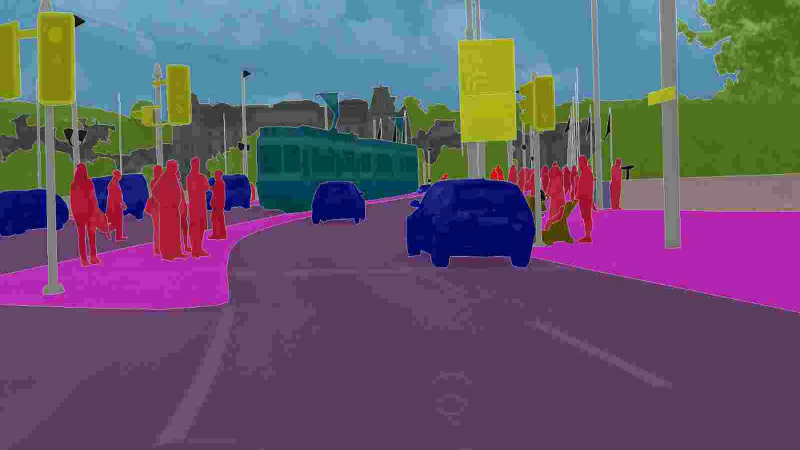

Problem statement : Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants us to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.

**Call Libraries**

In [1]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline

from scipy.stats import scoreatpercentile, pearsonr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###Data exploration and feature engineering

In [3]:

mobile = pd.read_csv("../input/mobilefeaturesdataset/train.csv"
                )

In [4]:

mobile.rename(columns = {'fc':'frontCamera', 'pc':'primaryCamera',
                              'sc_h':'screenHeight','sc_w':'screenWidth','blue':'bluetooth','m_dep':'mobileDepth'}, inplace = True)

In [5]:
mobile.dtypes

battery_power      int64
bluetooth          int64
clock_speed      float64
dual_sim           int64
frontCamera        int64
four_g             int64
int_memory         int64
mobileDepth      float64
mobile_wt          int64
n_cores            int64
primaryCamera      int64
px_height          int64
px_width           int64
ram                int64
screenHeight       int64
screenWidth        int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
mobile['BatPowIndex'] = pd.cut(mobile['battery_power'], bins = 5, labels = ["Bad","Low","Average","Good","Excellent"])

In [7]:
mobile['CSpeedCat']=pd.cut(mobile['clock_speed'], bins = 3, labels = ["low","Average","Good"])

In [8]:
mobile.isnull().sum().sum()

0

*There are no nulls in the dataset*


### Visualization

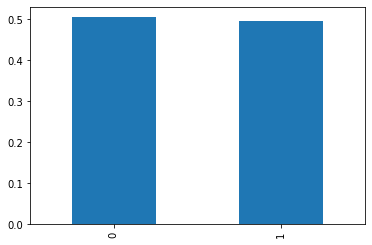

In [9]:
bluetoothPer=mobile['bluetooth'].value_counts(normalize=True)
bluetoothPer.plot.bar();

In [10]:
bluetoothPer

0    0.505
1    0.495
Name: bluetooth, dtype: float64

*mobiles which do not have bluetooth enabled are marginally higher than phones which have bluetooth enabled.*

In [11]:
print("Maximum clock speed of Mobiles is "+ str(mobile['clock_speed'].max()))
print("Minumum clock speed of Mobiles is "+ str(mobile['clock_speed'].min()))

Maximum clock speed of Mobiles is 3.0
Minumum clock speed of Mobiles is 0.5


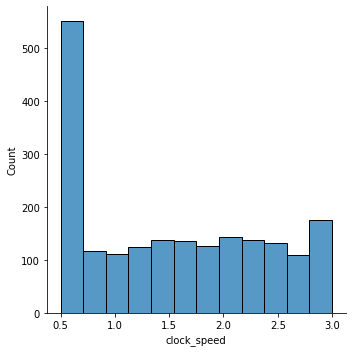

In [12]:
sns.displot(mobile.clock_speed);

*most mobiles have clock speed of 0.5 but the next highest count of mobiles is of greatest clockspeed of 3.0*

In [13]:
mobile['dual_sim'].value_counts(normalize=True)

1    0.5095
0    0.4905
Name: dual_sim, dtype: float64

*Marginally higher number of phones are dual sim*

In [14]:
mobile['frontCamera'].value_counts(normalize=True)

0     0.2370
1     0.1225
2     0.0945
3     0.0850
5     0.0695
4     0.0665
6     0.0560
7     0.0500
9     0.0390
8     0.0385
10    0.0310
11    0.0255
12    0.0225
13    0.0200
16    0.0120
15    0.0115
14    0.0100
18    0.0055
17    0.0030
19    0.0005
Name: frontCamera, dtype: float64

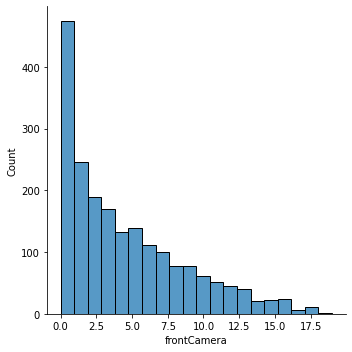

In [15]:
sns.displot(mobile.frontCamera);

*most mobiles do not have a front camera.Mobiles with higher megapixels of frontCamera are fewer*

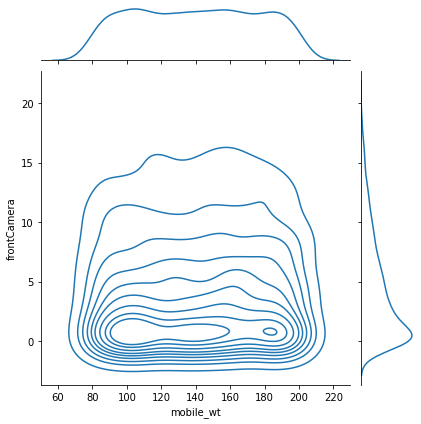

In [16]:
sns.jointplot(
               mobile.mobile_wt, 
               mobile.frontCamera, 
               kind = "kde"        
               );

*Mobile Weight is higher for mobiles with no front camera and less than 2 megapixels.*

In [17]:
mobile['four_g'].value_counts(normalize=True)

1    0.5215
0    0.4785
Name: four_g, dtype: float64

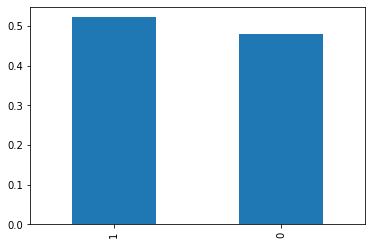

In [18]:
FourG=mobile['four_g'].value_counts(normalize=True)
FourG.plot.bar();

*most Phones are 4G enabled*

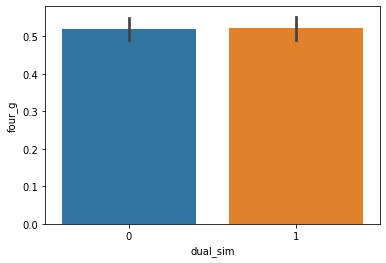

In [19]:
sns.barplot(x = 'dual_sim',
            y = 'four_g',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );


*on an average there are equal number of dual sim and non dual sim phones , 
which are 4G enabled.*

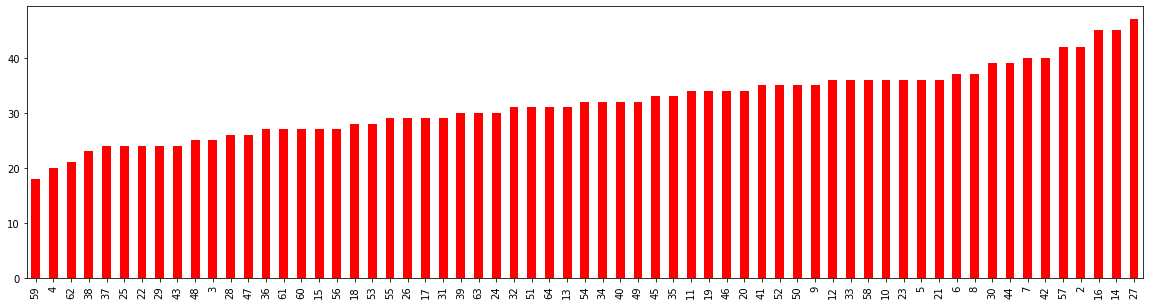

In [20]:
memSeries=mobile['int_memory'].value_counts(ascending=True)
plt=memSeries.plot.bar(figsize=(20,5),color="red");


In [21]:
memindex=memSeries.index

In [22]:
print("most phones ("+str(memindex.size)+") have memory(int) "+str(memSeries.max()))
print("least phones ("+str(memindex[0])+") have memory(int) "+str(memSeries.min()))

most phones (63) have memory(int) 47
least phones (59) have memory(int) 18


In [23]:
mobile['mobileDepth'].value_counts(ascending=False)

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: mobileDepth, dtype: int64

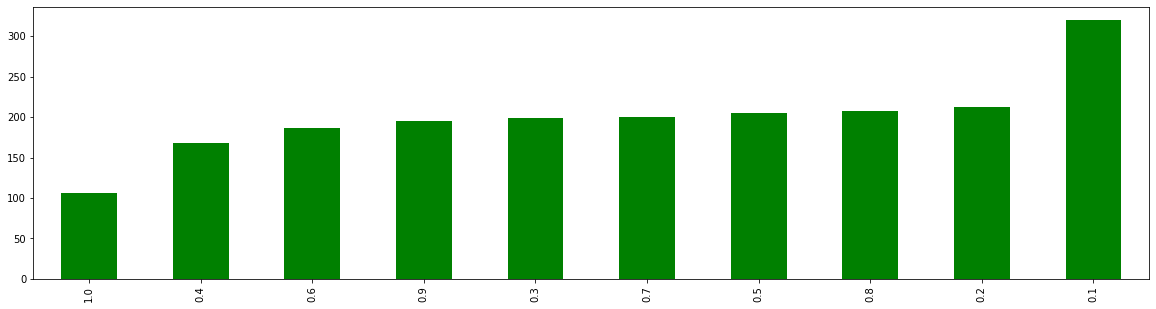

In [24]:
mobileDepth=mobile['mobileDepth'].value_counts(ascending=True);
mobileDepth.plot.bar(figsize=(20,5),color="green");


*Mobiles with least depth are most preferred.*

In [25]:
mobile['mobile_wt'].value_counts(ascending=False)

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64

In [26]:
mobile['mobile_wt'].max()

200

In [27]:
mobile['mobile_wt'].min()

80

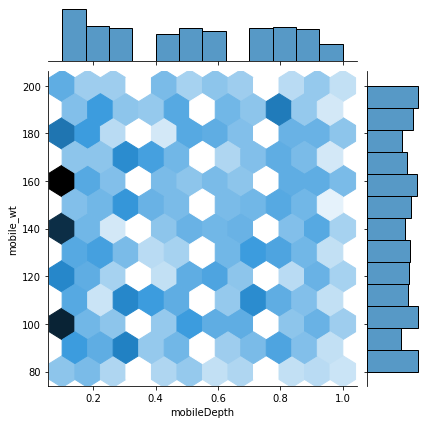

In [28]:
sns.jointplot(
               mobile.mobileDepth, 
               mobile.mobile_wt, 
               kind = "hex"        # Try also bw_adjust = 0.25 and then 1.0
               );

*mobiles with lower depth have both the highest and lowest mobiles weights.*

In [29]:
mobile['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

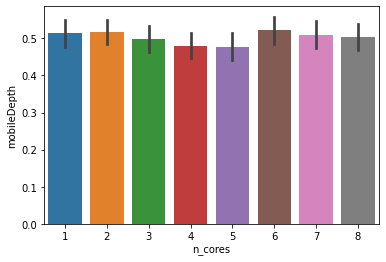

In [30]:
sns.barplot(x = 'n_cores',
            y = 'mobileDepth',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );


*on an average the mobiles with 6 cores have highest depth with a disclaimer of a high error interval*

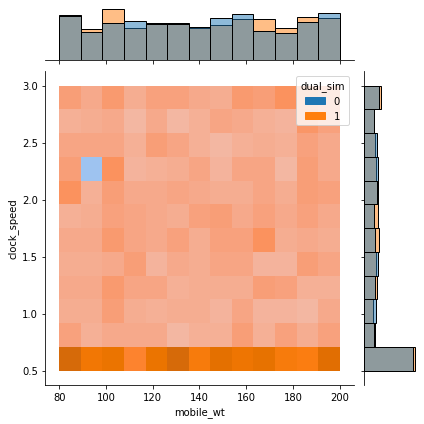

In [31]:
sns.jointplot(
               mobile.mobile_wt, 
               mobile.clock_speed, 
               hue=mobile.dual_sim,
               kind = "hist"        # Try also bw_adjust = 0.25 and then 1.0
               );

*1)Dual Sim phones have highest battery power of 600Mah with clock speed of 
upto 0.5<br>
2)non Dual Sim phones have have highest battery power of 1200 Mah and cloclkspeed of 2.6*

*It can hence be deduced that Mobiles which do not have a dual sim have highest battery power and clock speed on average.Although there are Dual Sim phones with higher battery power their clock speed is lowest at 0.5*


In [32]:
primCamSeries=mobile['primaryCamera'].value_counts(ascending=True) #primary camera
primCamIndices= primCamSeries.index

primCamIndices.max()

20

In [33]:
print(str(primCamSeries.max())+" mobiles have greatest primary camera capacity of "+str(primCamIndices.size)+" megapixels")
print(str(primCamSeries.min())+" mobiles have least primary camera capacity of "+str(primCamIndices[0])+" megapixels")

122 mobiles have greatest primary camera capacity of 21 megapixels
59 mobiles have least primary camera capacity of 5 megapixels


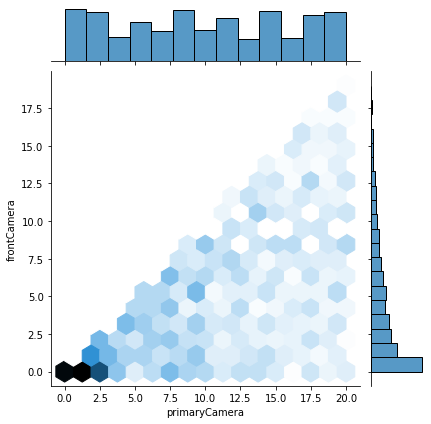

In [34]:
sns.jointplot(mobile.primaryCamera,
              mobile.frontCamera,
              kind = "hex"
              );

*It can be clearly deduced that for most mobiles with primary camera capacity is 0 to 2.5 megapixels have no front camera ( xero pixels)*

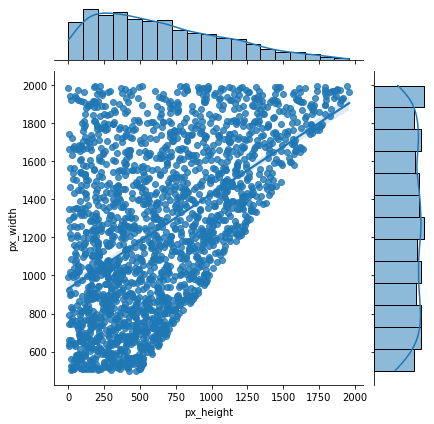

In [35]:
sns.jointplot(mobile.px_height,
              mobile.px_width,
              kind = "reg"
              );

*The width and height of the pixels increase proportional to each other.*

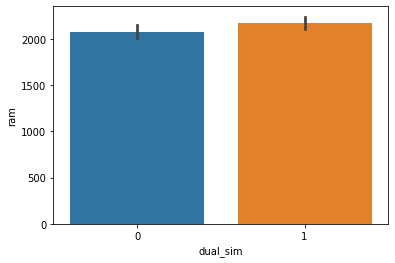

In [36]:
sns.barplot(x = 'dual_sim',
            y = 'ram',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );


*Dual sim phones are likely to have marginally higher RAM*

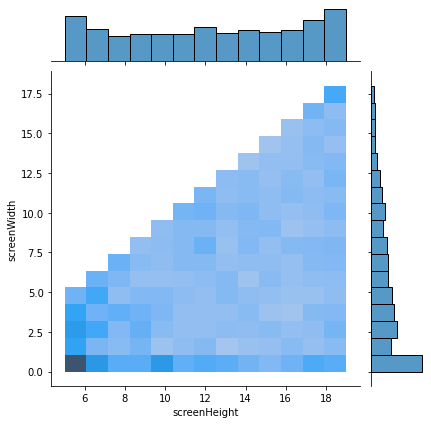

In [37]:
sns.jointplot(mobile.screenHeight,
              mobile.screenWidth,
              kind = "hist"
              );

*Most mobiles are of the smallest screen height and screen width.*

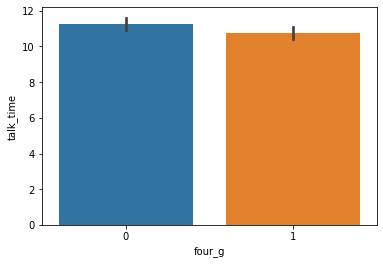

In [38]:
sns.barplot(x = 'four_g',
            y = 'talk_time',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );

*Talktime is marginally higher on Mobiles where 4G is not enabled*

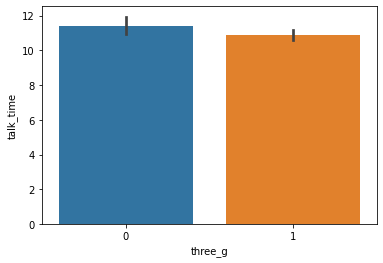

In [39]:
sns.barplot(x = 'three_g',
            y = 'talk_time',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );

*Talktime is higher in Mobiles where 3G is not enabled.*

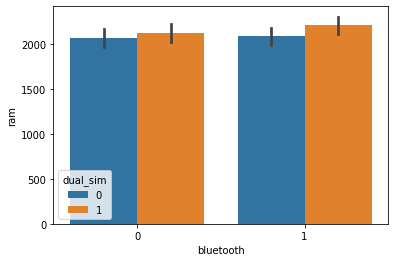

In [40]:
fig=sns.barplot(x = 'bluetooth',
            y = 'ram',
            hue = 'dual_sim',       # Age-cat wise plots
            estimator = np.mean,
            ci = 95,
            data =mobile);

*Among the mobiles that have bluetooth enable the dual sim enabled mobiles have the greatest RAM*

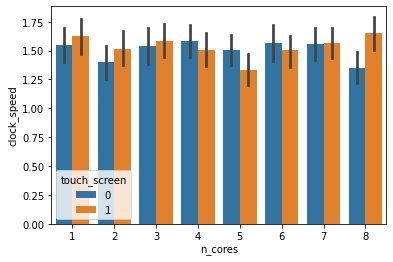

In [41]:
sns.barplot(x = 'n_cores',
            y = 'clock_speed',
            hue = 'touch_screen',       # Age-cat wise plots
            estimator = np.mean,
            ci = 95,
            data =mobile);

*Touch screen phones which have 8 cores have the highest clock speed*

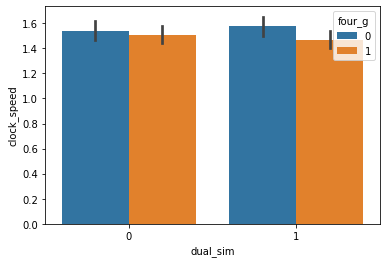

In [42]:
sns.barplot(x = 'dual_sim',
            y = 'clock_speed',
            hue = 'four_g',       # Age-cat wise plots
            estimator = np.mean,
            ci = 95,
            data =mobile);

In [43]:
mobile['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

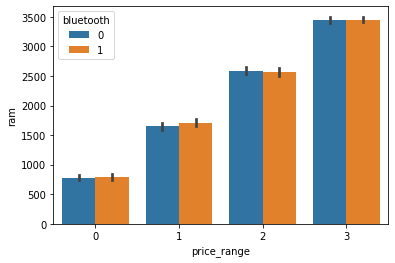

In [44]:
sns.barplot(x = 'price_range',
            y = 'ram',
            estimator = np.mean ,  
            hue = 'bluetooth', # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );

*Price ranges move higher with increase in RAM of mobiles*

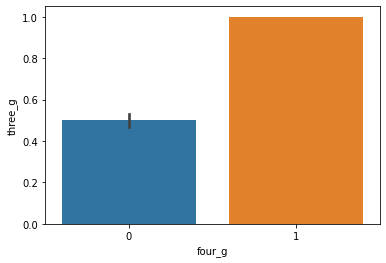

In [45]:
sns.barplot(x = 'four_g',
            y = 'three_g',
            estimator = np.mean ,  
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = mobile,               # Try np.mean also
            #capsize = 1
            );

*1)Almost all mobiles which have 4G enabled have 3G enabled too*<br>
*2)There are 50% Mobiles which do not have 4G enabled but have 3G enabled*

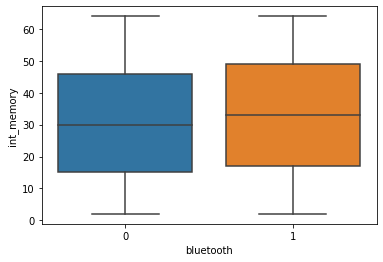

In [46]:
sns.boxplot(x = 'bluetooth',       # Discrete
            y = 'int_memory',                 # Continuous
            data = mobile
            );


*For mobiles which have bluetooth enabled the int_memory is always higher than in mobiles where bluetooth is not enabled.the minimum memory is also higher for mobiles which have bluetooth enabled.*

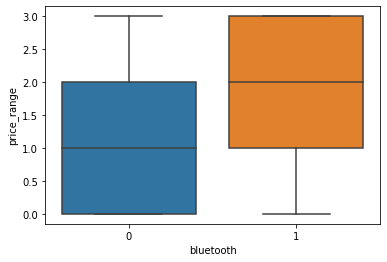

In [47]:
sns.boxplot(x = 'bluetooth',       # Discrete
            y = 'price_range',                 # Continuous
            data = mobile
            );

*The price of mobiles with bluetooth enabled is 50% higher than the ones which do not have bluetooth enabled.*

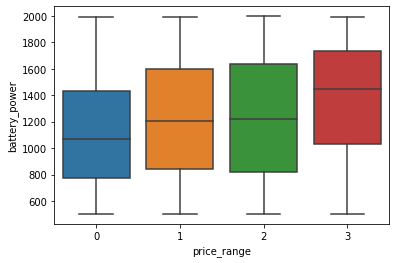

In [48]:
sns.boxplot(x = 'price_range',       # Discrete
            y = 'battery_power',                 # Continuous
            data = mobile
            );

*Mobiles in highest price range have higher battery power.<br>
As the prict range increases the higher limit of the battery power also increases*

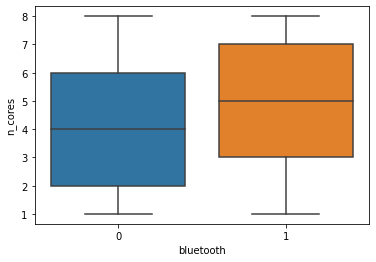

In [49]:
sns.boxplot(x = 'bluetooth',       # Discrete
            y = 'n_cores',                 # Continuous
            data = mobile
            );

*1)Mobiles with bluetooth enabled have have on average 5 cores <br>
2)Mobiles without bluetooth have an average of 4 cores*


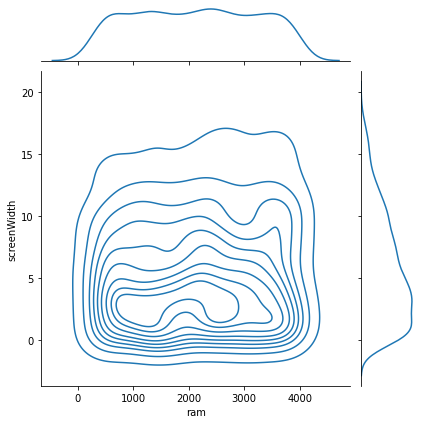

In [50]:
sns.jointplot(mobile.ram,
              mobile.screenWidth,
              kind = "kde"
              );

*for mobiles with screen width 1 and 3 , the RAM size is 800 to 2800.*

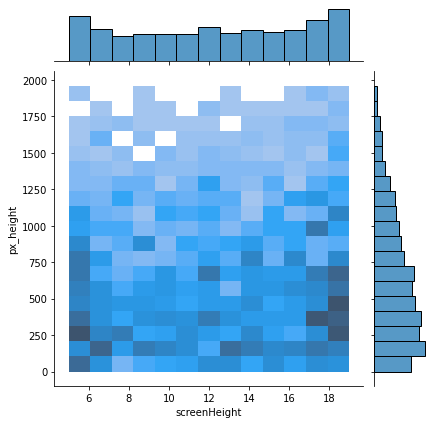

In [51]:
sns.jointplot(mobile.screenHeight,
              mobile.px_height,
              kind = "hist"
              );

*pixelheight is concentrated between 250 and 750 for screenheight's lowset and highest range.*

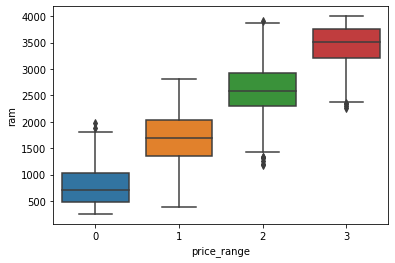

In [52]:
sns.boxplot(x = 'price_range',       # Discrete
            y = 'ram',                 # Continuous
            data = mobile
            );

*The price range increases for mobiles with higher RAM*

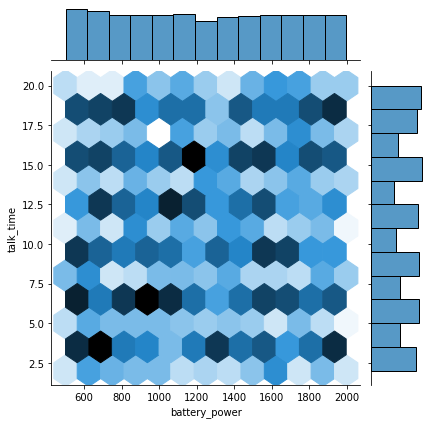

In [53]:
sns.jointplot(mobile.battery_power,
              mobile.talk_time,
              kind = "hex"
              );

*Mobiles of various battery power and talk time are popular*

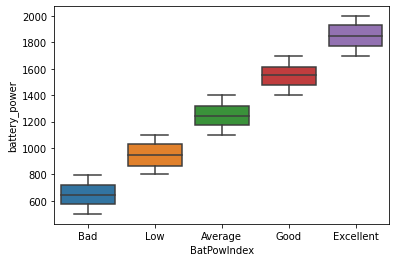

In [54]:
sns.boxplot(x = 'BatPowIndex',       # Discrete
            y = 'battery_power',                 # Continuous
            data = mobile
            );

*Mobiles with 'Bad' battery power index have battery power of 700 MAH, while the mobiles with 'Excellent' battery power index have average battery power of 1800 MAH*

In [55]:
mobile['clock_speed'].max()

3.0

In [56]:
mobile.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'frontCamera',
       'four_g', 'int_memory', 'mobileDepth', 'mobile_wt', 'n_cores',
       'primaryCamera', 'px_height', 'px_width', 'ram', 'screenHeight',
       'screenWidth', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'BatPowIndex', 'CSpeedCat'],
      dtype='object')

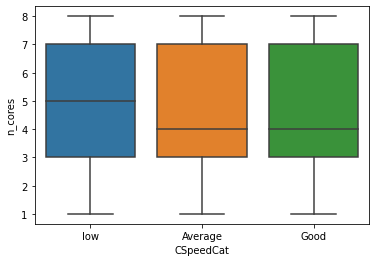

In [57]:
sns.boxplot(x = 'CSpeedCat',       # Discrete
            y = 'n_cores',                 # Continuous
            data = mobile
            );

*Surprisingly, Mobiles with 5 cores have low clock speed and mobiles with 4 cores have Average to Good Clock speed.*

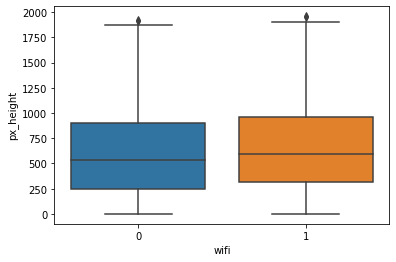

In [58]:
sns.boxplot(x = 'wifi',       # Discrete
            y = 'px_height',                 # Continuous
            data = mobile
            );

*on average , mobile which have wifi enabled have greater pixel height.*

##Segmentation

In [59]:
# 1.0 Call libraries

import pandas as pd
import numpy as np

# 1.0.1 For plotting
import matplotlib.pyplot as plt

# 1.0.2 Class for clustering
from sklearn.cluster import KMeans

# 1.0.3 Get dataset
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

import os,time

In [60]:
mobile = pd.read_csv("../input/mobilefeaturesdataset/train.csv"
                )

In [61]:
mobile.rename(columns = {'fc':'frontCamera', 'pc':'primaryCamera',
                              'sc_h':'screenHeight','sc_w':'screenWidth','blue':'bluetooth','m_dep':'mobileDepth'}, inplace = True)

In [62]:
y=mobile.pop('price_range')

In [63]:
X=mobile

In [64]:
shuffledX = X.sample(frac=1)

In [65]:
shuffledXIndices=list(shuffledX.index)

In [66]:
y=y[shuffledXIndices]

In [67]:
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [68]:
kmeans = KMeans(n_clusters = 4)    

In [69]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
kmeans.labels_

array([3, 2, 2, ..., 1, 1, 0], dtype=int32)

In [71]:
kmeans.inertia_

34222.664399107736

In [72]:
sse = []

# 5.1 Vary number of clusters
#     For no of clusters as: i
for i in range(1, 10):
  # 5.1.1 Initialise KMeans   
  kmeans = KMeans(
                  n_clusters = i,
                  max_iter = 300)
  # 5.1.2 'train' the instantiated object
  kmeans.fit(X)
  # 5.1.3 Calculate inertia and append it
  #       to sse
  sse.append(kmeans.inertia_)    

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SSE')

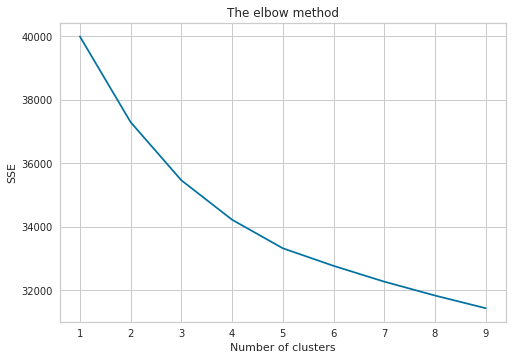

In [73]:
plt.plot(range(1, 10), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Sum of squared errors
plt.show()

In [74]:
from sklearn.metrics import silhouette_score

silhouettes = []
inertia=[]
kmin = 2
kmax = 11
for k in range(kmin, kmax+1):
  # We fit the KMeans algo with k clusters    
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  # We calculate the silhouette score and append it to the silhouette list
  silhouettes.append(silhouette_score(X, labels, metric = 'euclidean'))
  inertia.append(kmeans.inertia_)



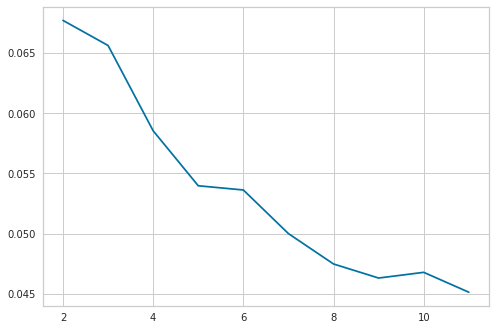

In [75]:
plt.plot(range(kmin,kmax+1),silhouettes) ;
plt.show() ;

In [76]:
silhouettes

[0.06771623890102013,
 0.0656308667280027,
 0.05854019020067121,
 0.05397207860495438,
 0.053622227889293016,
 0.04999486570917982,
 0.04747058220939186,
 0.046302383597850175,
 0.04677632504377176,
 0.04512480385079576]

##Final Model for Segmentation

In [77]:
model = KMeans(
                n_clusters=3,
                max_iter=500
              )

In [78]:
model.fit(X)

KMeans(max_iter=500, n_clusters=3)

In [79]:
XLabels=model.predict(X)
XLabels

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [80]:
model.labels_

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [81]:
len(model.labels_)
print()

#cl_labels=model.predict(X)
#cl_labels
# 5.2.1
model.inertia_
print()

2000

35466.556641933

### Silhoutte plot

In [82]:
visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

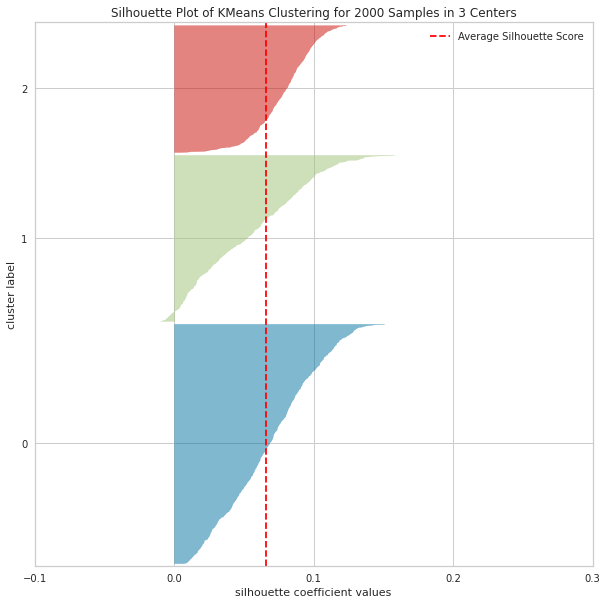

0.009459670384724934

In [83]:
fig = plt.figure(figsize= (10,10))
start = time.time()
_= visualizer.fit(X)        # Fit the data to the visualizer
_= visualizer.show()        # Finalize and render the figure
end = time.time()
(end-start)/60

***Conclusion : 3 clusters of Mobiles have been chosen basis scree plot and corresponding silhouette score***

### Classification

In [84]:
import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
#from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1.1.7
from sklearn.datasets import make_classification

In [85]:
mobile = pd.read_csv("../input/mobilefeaturesdataset/train.csv"
                )

In [86]:
y=mobile.pop("price_range")
X=mobile

In [87]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [88]:
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )


In [90]:
X_train.shape  
print()

X_test.shape  
print()

(1400, 20)

(600, 20)

In [91]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [92]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
y_te = ct.predict(X_test)

In [94]:
np.sum((y_test == y_te))/y_test.size  

0.8183333333333334

*Since the success rate of prediction is only 82.3% , we shall train the train the decision tree with the most import features*

In [95]:
fi = ct.feature_importances_
fi

array([0.1409753 , 0.0015873 , 0.00418883, 0.        , 0.01252608,
       0.        , 0.01204179, 0.00578547, 0.01100419, 0.00469504,
       0.00619666, 0.09014414, 0.08291161, 0.60217537, 0.00588864,
       0.00736993, 0.01250965, 0.        , 0.        , 0.        ])

In [96]:
ct1 = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [97]:
ct1.fit(X_train[:,[0,11,13]],y_train)

DecisionTreeClassifier()

In [98]:
y_te1 = ct1.predict(X_test[:,[0,11,13]])

In [99]:
np.sum((y_test == y_te1))/y_test.size 

0.8366666666666667

*Performance marginally improves when the decision is trained with most important features*

In [100]:
fi = ct1.feature_importances_
fi

array([0.20320167, 0.14211432, 0.65468402])

In [101]:
ct2 = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [102]:
ct2.fit(X_train[:,[13]],y_train)

DecisionTreeClassifier()

In [103]:
y_te2 = ct2.predict(X_test[:,[13]])

In [104]:
np.sum((y_test == y_te2))/y_test.size 

0.6383333333333333

***Surprisingly the performance has further reduced to 66 percent. <br>Hence the best preduction of price range for mobile is possible by the decision tree model when the features of battery power , pixel height and RAM are input***

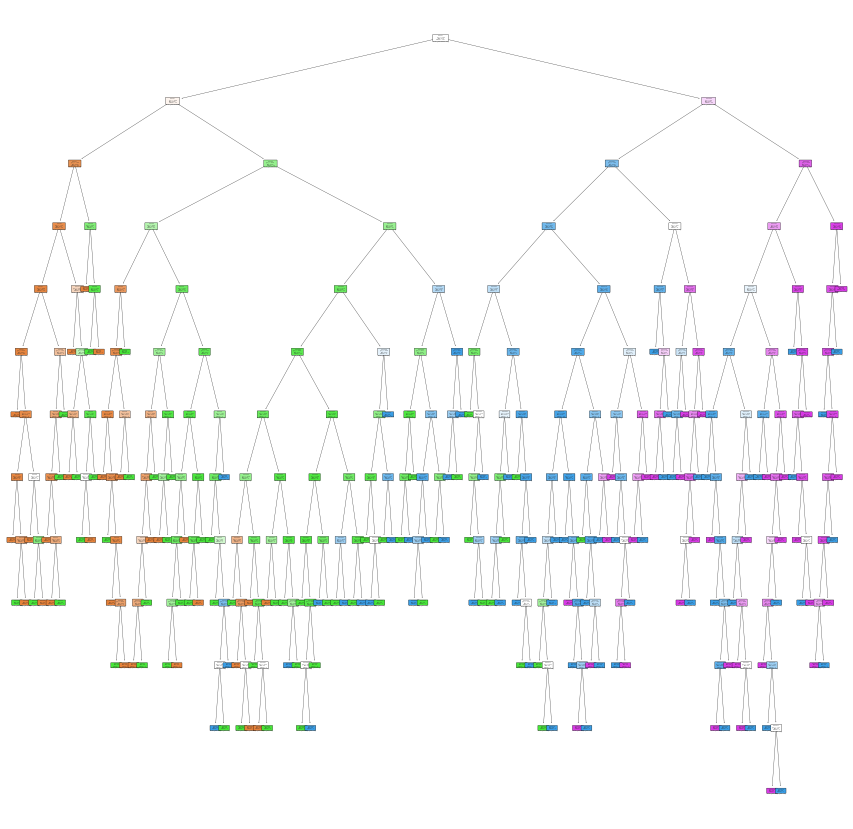

In [105]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = None,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True# Display node_id
    #        feature_names =feature_names,
   #         class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()